# 지도학습 알고리즘 성능비교

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np

## 데이터 불러오기

In [29]:
penguin_df = sns.load_dataset('penguins')
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


- species : 펭귄 종  (범주형)
- island : 서식지 섬 이름 (범주형)
- bill_length_mm : 부리 길이 (수치형)
- bill_depth_mm : 부리 깊이 (수치형)
- flipper_length_mm : 지느러미 길이 (수치형)
- body_mass_g : 몸무게 (수치형)
- sex : 성별(범주형)

In [30]:
penguin_df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [31]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## 데이터 전처리

In [32]:
from scipy.stats import chi2_contingency

chi_df = penguin_df.dropna(subset=['species', 'sex'])  # 결측값 제거

table = pd.crosstab(chi_df['species'], chi_df['sex'])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-squared value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-squared value: 0.04860717014078318
p-value: 0.9759893689765846
Degrees of freedom: 2
Expected frequencies:
 [[72.34234234 73.65765766]
 [33.69369369 34.30630631]
 [58.96396396 60.03603604]]


In [33]:
m_penguin_df = penguin_df.drop(columns='sex').dropna()
X = m_penguin_df.drop(columns='species')
y = m_penguin_df['species']

In [34]:
X.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

## 라벨 인코딩

In [35]:
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y) # y 라벨 데이터 인코딩

In [36]:
le_island = LabelEncoder()
X['island'] = le_island.fit_transform(X['island'])

## 훈련데이터, 테스트데이터 분할

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=2020158011
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train,
    test_size=0.3,
    random_state=2020158011
)

## 분류나무 사용

In [38]:
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

clf_dt = DecisionTreeClassifier(random_state=2020158011,
                                max_depth=3,
                                criterion = 'entropy')
clf_dt.fit(X_train, y_train)
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_test_pred = clf_dt.predict(X_test)

In [39]:
train_acc = accuracy_score(y_train, y_train_pred)
valid_acc = accuracy_score(y_valid, y_valid_pred)
test_acc = accuracy_score(y_test, y_test_pred)
dt_f1 = f1_score(y_test, y_test_pred, average='macro')
print('- Accuracy (Train) : {:.4}'.format(train_acc))
print('- Accuracy (Valid) : {:.4}'.format(valid_acc))
print('- Accuracy (Test) : {:.4}'.format(test_acc))
print('f1-score : {:.4f}'.format(dt_f1))

- Accuracy (Train) : 0.9948
- Accuracy (Valid) : 0.9146
- Accuracy (Test) : 0.971
f1-score : 0.9707


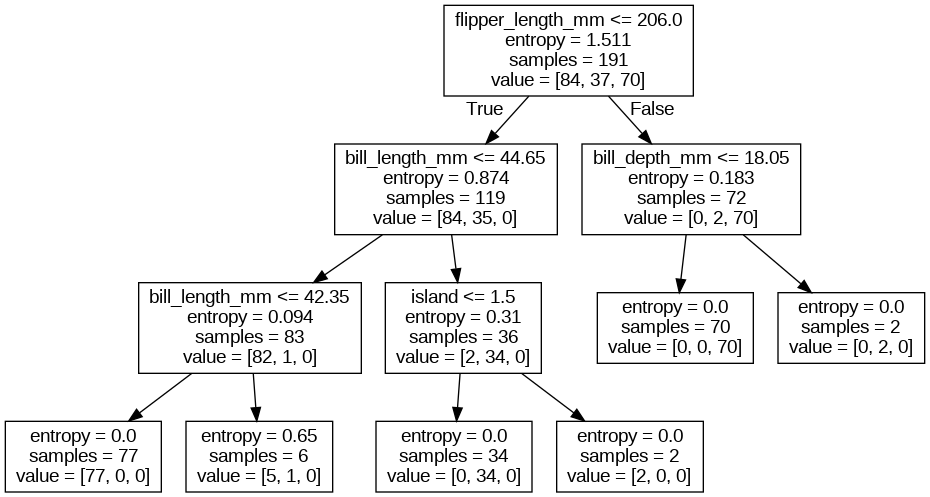

In [40]:
graph = Source(export_graphviz(clf_dt,
                               out_file=None,
                               feature_names=X.columns,
                               ))
Image(graph.pipe(format='png')) #['Adelie','Chinstrap','Gentoo']


##랜덤 포레스트 사용

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=2015010720,
                                n_estimators=100,
                                max_depth=3)
clf_rf.fit(X_train,y_train)
y_train_pred2 = clf_rf.predict(X_train)
y_valid_pred2 = clf_rf.predict(X_valid)
y_test_pred2 = clf_rf.predict(X_test)

In [42]:
train_acc2 = accuracy_score(y_train, y_train_pred2)
valid_acc2 = accuracy_score(y_valid, y_valid_pred2)
test_acc2 = accuracy_score(y_test, y_test_pred2)
rf_f1 = f1_score(y_test, y_test_pred2, average='macro')
print('- Accuracy (Train) : {:.4}'.format(train_acc2))
print('- Accuracy (Valid) : {:.4}'.format(valid_acc2))
print('- Accuracy (Test) : {:.4}'.format(test_acc2))
print('f1-score : {:.4f}'.format(rf_f1))

- Accuracy (Train) : 0.9895
- Accuracy (Valid) : 0.9268
- Accuracy (Test) : 0.971
f1-score : 0.9707


## adaboost 사용

In [43]:
from sklearn.ensemble import AdaBoostClassifier


clf_ada = AdaBoostClassifier(random_state=2020158011,
                             n_estimators=100,
                             learning_rate=0.1)
clf_ada.fit(X_train,y_train)
y_train_pred3 = clf_ada.predict(X_train)
y_valid_pred3 = clf_ada.predict(X_valid)
y_test_pred3 = clf_ada.predict(X_test)


In [44]:
ab_f1 = f1_score(y_test, y_test_pred3, average='macro')
train_acc3 = accuracy_score(y_train, y_train_pred3)
valid_acc3 = accuracy_score(y_valid, y_valid_pred3)
test_acc3 = accuracy_score(y_test, y_test_pred3)
print('- Accuracy (Train) : {:.4}'.format(train_acc3))
print('- Accuracy (Valid) : {:.4}'.format(valid_acc3))
print('- Accuracy (Test) : {:.4}'.format(test_acc3))
print('f1-score : {:.4f}'.format(ab_f1))

- Accuracy (Train) : 0.9843
- Accuracy (Valid) : 0.9146
- Accuracy (Test) : 0.9855
f1-score : 0.9852


## 결론

In [45]:
print('- 분류 나무 정확도 (Test) : {:.4}'.format(test_acc))
print('- 분류 나무 f1-score (Test) : {:.4f}'.format(dt_f1))
print('- 랜덤포레스트 정확도 (Test) : {:.4}'.format(test_acc2))
print('- 랜덤포레스트 f1-score (Test) : {:.4f}'.format(rf_f1))
print('- Adaboost 정확도 (Test) : {:.4}'.format(test_acc3))
print('- Adaboost f1-score (Test) : {:.4f}'.format(ab_f1))

- 분류 나무 정확도 (Test) : 0.971
- 분류 나무 f1-score (Test) : 0.9707
- 랜덤포레스트 정확도 (Test) : 0.971
- 랜덤포레스트 f1-score (Test) : 0.9707
- Adaboost 정확도 (Test) : 0.9855
- Adaboost f1-score (Test) : 0.9852


## 결과 시각화

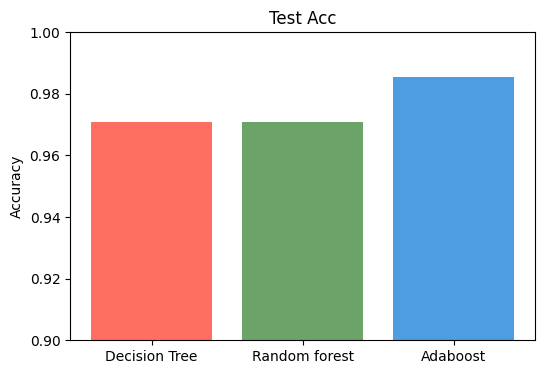

In [46]:
import matplotlib.pyplot as plt
colors = ['#FF6F61', '#6BA368', '#4D9DE0']
plt.rc('font', family=' ')
name = ['Decision Tree', 'Random forest', 'Adaboost']
acc = [test_acc, test_acc2, test_acc3]
plt.figure(figsize=(6,4))
plt.bar(name, acc,color=colors)
plt.title('Test Acc')
plt.ylim(0.9,1.0)
plt.ylabel('Accuracy')

plt.show()

## 결정트리 confusion matrix 확인

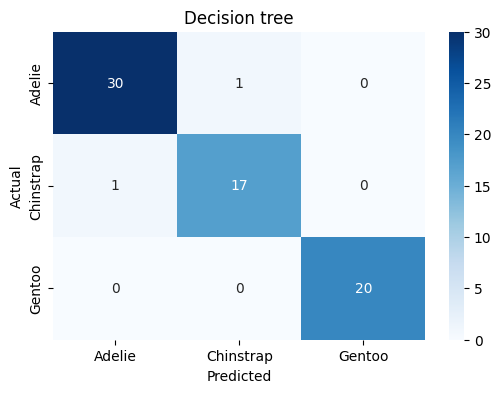

f1-score : 0.9707


In [47]:
cm = confusion_matrix(y_test, y_test_pred)

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Decision tree')
plt.show()

f1 = f1_score(y_test, y_test_pred, average='macro')
print(f'f1-score : {dt_f1:.4f}')



## 랜덤 포레스트 confusion matrix 확인

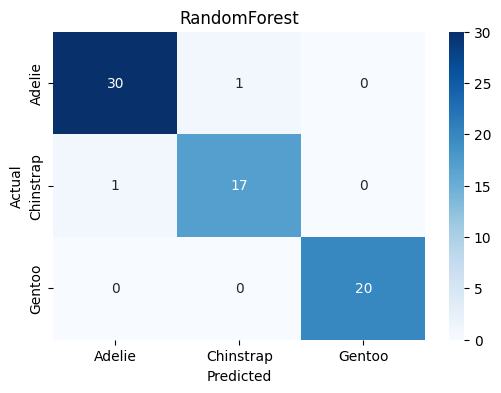

f1-score : 0.9707


In [48]:
cm2 = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('RandomForest')
plt.show()
print(f'f1-score : {rf_f1:.4f}')

## Adaboost Confusion matrix 확인

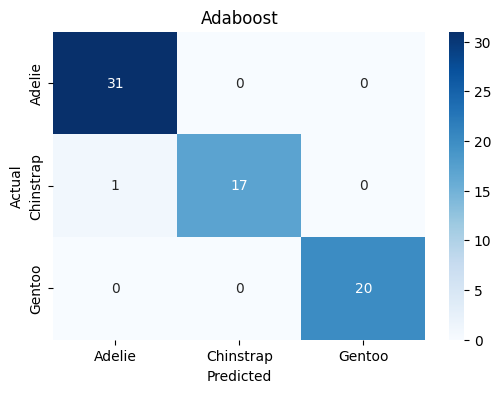

f1-score : 0.9852


In [49]:
cm3 = confusion_matrix(y_test, y_test_pred3)

plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Adaboost')
plt.show()
print(f'f1-score : {ab_f1:.4f}')